In [ ]:
import torch
from torchvision.utils import make_grid
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import sys

In [ ]:
def weights_init(m):
    if type(m) == nn.Linear:
        m.weight.data.normal_(0.0, 1e-3)
        m.bias.data.fill_(0.)

def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [ ]:
#--------------------------------
# Device configuration
#--------------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device: %s'%device)

Using device: cuda


In [ ]:
#-------------------------------------------------
# Load the CIFAR-10 dataset
#-------------------------------------------------
norm_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])
cifar_dataset = torchvision.datasets.CIFAR10(root='/content/drive/MyDrive/Ex2-Pytorch/datasets/',
                                           train=True,
                                           transform=norm_transform,
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='/content/drive/MyDrive/Ex2-Pytorch/datasets/',
                                          train=False,
                                          transform=norm_transform
                                          )

Files already downloaded and verified


In [ ]:
#--------------------------------
# Hyper-parameters
#--------------------------------
batch_size = 200
num_training = 49000
num_validation =1000

In [ ]:
#-------------------------------------------------
# Prepare the training and validation splits
#-------------------------------------------------
mask = list(range(num_training))
train_dataset = torch.utils.data.Subset(cifar_dataset, mask)
mask = list(range(num_training, num_training + num_validation))
val_dataset = torch.utils.data.Subset(cifar_dataset, mask)

In [ ]:
#-------------------------------------------------
# Data loader
#-------------------------------------------------
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

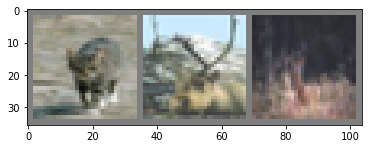

  cat	         deer	         deer


In [ ]:
#-------------------------------------------------
# Check dataset
#-------------------------------------------------
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[0:3]))
# print labels
print('\t        '.join('%5s' % classes[labels[j]] for j in range(3)))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images.shape: torch.Size([200, 3, 32, 32])


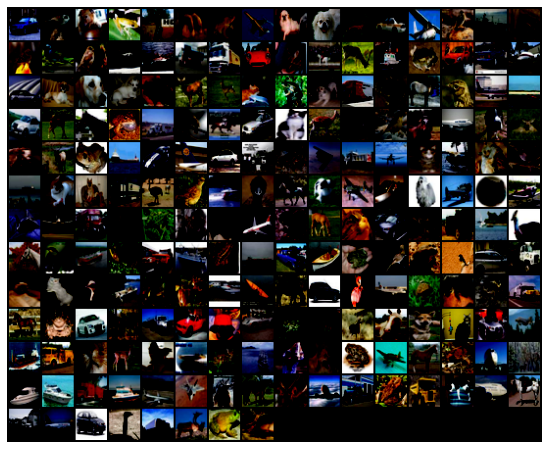

In [ ]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

###**1. --------------------------------Fully connected neural network with one hidden layer--------------------------------**


In [ ]:
#--------------------------------
# Hyper-parameters
#--------------------------------
input_size = 32 * 32 * 3
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 200
learning_rate = 1e-3
learning_rate_decay = 0.95
reg=0.001
num_training= 49000
num_validation =1000
train = True
epoch_loss = 0

In [ ]:
#-------------------------------------------------
# Fully connected neural network with one hidden layer
#-------------------------------------------------
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MultiLayerPerceptron, self).__init__()
        #################################################################################
        # TODO: Initialize the modules required to implement the mlp with given layer   #
        # configuration. input_size --> hidden_layers[0] --> hidden_layers[1] .... -->  #
        # hidden_layers[-1] --> num_classes                                             #
        # Make use of linear and relu layers from the torch.nn module                   #
        #################################################################################
        layers = []
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        self.fc1 = nn.Linear(input_size, hidden_size) # first hidden layer
        self.relu = nn.ReLU() # activation function
        self.output = nn.Linear(hidden_size, num_classes) # output layer

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        #################################################################################
        # TODO: Implement the forward pass computations                                 #
        # Note that you do not need to use the softmax operation at the end.            #
        # Softmax is only required for the loss computation and the criterion used below#
        # nn.CrossEntropyLoss() already integrates the softmax and the log loss together#
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        out = self.fc1(x)
        out = self.relu(out)
        out = self.output(out)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

model = MultiLayerPerceptron(input_size, hidden_size, num_classes).to(device)

In [ ]:
print(model)

MultiLayerPerceptron(
  (fc1): Linear(in_features=3072, out_features=500, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=500, out_features=10, bias=True)
  (layers): Sequential()
)


In [ ]:
#if train:
model.apply(weights_init)


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=reg)

# Train the model
lr = learning_rate
total_step = len(train_loader)
running_loss = 0.0

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        #################################################################################
        # TODO: Implement the training code                                             #
        # 1. Pass the images to the model                                               #
        # 2. Compute the loss using the output and the labels.                          #
        # 3. Compute gradients and update the model using the optimizer                 #
        # Use examples in https://pytorch.org/tutorials/beginner/pytorch_with_examples.html
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        # Forward Pass
        prediction = model(images) 
        loss = criterion(prediction, labels)

        # Backward Pass 
        model.zero_grad()
        loss.backward()
        optimizer.step()

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                    .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Code to update the lr
    lr *= learning_rate_decay
    update_lr(optimizer, lr)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            images = images.reshape(-1, input_size).to(device)
            labels = labels.to(device)
            ####################################################
            # TODO: Implement the evaluation code              #
            # 1. Pass the images to the model                  #
            # 2. Get the most confident predicted class        #
            ####################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
                
            prediction = model(images)
            _, predicted = torch.max(prediction.data, 1)

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Validataion accuracy is: {} %'.format(100 * correct / total))

##################################################################################
# TODO: Now that you can train a simple two-layer MLP using above code, you can  #
# easily experiment with adding more layers and different layer configurations   #
# and let the pytorch library handle computing the gradients                     #
#                                                                                #
# Experiment with different number of layers (atleast from 2 to 5 layers) and    #
# record the final validation accuracies Report your observations on how adding  #
# more layers to the MLP affects its behavior. Try to improve the model          #
# configuration using the validation performance as the guidance. You can        #
# experiment with different activation layers available in torch.nn, adding      #
# dropout layers, if you are interested. Use the best model on the validation    #
# set, to evaluate the performance on the test set once and report it            #
##################################################################################

# Save the model checkpoint
torch.save(model.state_dict(), '/content/drive/MyDrive/Ex2-Pytorch/model.ckpt')

Epoch [1/10], Step [100/245], Loss: 1.6314
Epoch [1/10], Step [200/245], Loss: 1.5330
Validataion accuracy is: 45.8 %
Epoch [2/10], Step [100/245], Loss: 1.5452
Epoch [2/10], Step [200/245], Loss: 1.5033
Validataion accuracy is: 49.9 %
Epoch [3/10], Step [100/245], Loss: 1.5246
Epoch [3/10], Step [200/245], Loss: 1.3690
Validataion accuracy is: 48.4 %
Epoch [4/10], Step [100/245], Loss: 1.3742
Epoch [4/10], Step [200/245], Loss: 1.4363
Validataion accuracy is: 51.4 %
Epoch [5/10], Step [100/245], Loss: 1.2449
Epoch [5/10], Step [200/245], Loss: 1.2926
Validataion accuracy is: 53.0 %
Epoch [6/10], Step [100/245], Loss: 1.2469
Epoch [6/10], Step [200/245], Loss: 1.2596
Validataion accuracy is: 53.5 %
Epoch [7/10], Step [100/245], Loss: 1.1382
Epoch [7/10], Step [200/245], Loss: 1.3431
Validataion accuracy is: 53.3 %
Epoch [8/10], Step [100/245], Loss: 1.1810
Epoch [8/10], Step [200/245], Loss: 1.2218
Validataion accuracy is: 54.1 %
Epoch [9/10], Step [100/245], Loss: 1.1290
Epoch [9/10],

In [ ]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print(params)

1541510


In [ ]:
#else:
# Run the test code once you have your by setting train flag to false
# and loading the best model

best_model = MultiLayerPerceptron(input_size, hidden_size, num_classes).cuda()
best_model.load_state_dict(torch.load('/content/drive/MyDrive/Ex2-Pytorch/model.ckpt'))
#model.load_state_dict(best_model)
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        ####################################################
        # TODO: Implement the evaluation code              #
        # 1. Pass the images to the model                  #
        # 2. Get the most confident predicted class        #
        ####################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        prediction = best_model(images)
        _, predicted = torch.max(prediction.data, 1)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if total == 1000:
            break

    print('Accuracy of the network on the {} test images: {} %'.format(total, 100 * correct / total))

Accuracy of the network on the 1000 test images: 52.2 %


In [ ]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
#imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(10)))

best_model = MultiLayerPerceptron(input_size, hidden_size, num_classes).cuda()
best_model.load_state_dict(torch.load('/content/drive/MyDrive/Ex2-Pytorch/model.ckpt'))
images = images.reshape(-1, input_size).to(device)
prediction = best_model(images)
_, predicted = torch.max(prediction, 1)

print('Predicted:   ', ' '.join('%5s' % classes[predicted[j]] for j in range(10)))


GroundTruth:    cat  ship  ship plane  frog  frog   car  frog   cat   car
Predicted:      cat truck plane  deer  deer  frog   car  frog  deer   car


###**2. --------------------------------Fully connected neural network with two hidden layer--------------------------------**

In [ ]:
#--------------------------------
# Hyper-parameters for model 2
#--------------------------------
input_size = 32 * 32 * 3
hidden_size_1 = 500
hidden_size_2 = 300
num_classes = 10
num_epochs = 10
batch_size = 200
learning_rate = 1e-3
learning_rate_decay = 0.95
reg=0.001
num_training= 49000
num_validation =1000
train = True

In [ ]:
#-------------------------------------------------
# Fully connected neural network with two hidden layer
#-------------------------------------------------
class MultiLayerPerceptron2(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MultiLayerPerceptron2, self).__init__()
        #################################################################################
        # TODO: Initialize the modules required to implement the mlp with given layer   #
        # configuration. input_size --> hidden_layers[0] --> hidden_layers[1] .... -->  #
        # hidden_layers[-1] --> num_classes                                             #
        # Make use of linear and relu layers from the torch.nn module                   #
        #################################################################################
        layers = []
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        self.fc1 = nn.Linear(input_size, hidden_size_1) # first hidden layer
        self.relu1 = nn.ReLU() # activation function

        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2) # second hidden layer
        self.relu2 = nn.ReLU() # activation function

        self.output = nn.Linear(hidden_size_2, num_classes) # output layer

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        #################################################################################
        # TODO: Implement the forward pass computations                                 #
        # Note that you do not need to use the softmax operation at the end.            #
        # Softmax is only required for the loss computation and the criterion used below#
        # nn.CrossEntropyLoss() already integrates the softmax and the log loss together#
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        out = self.fc1(x)
        out = self.relu1(out)

        out = self.fc2(out)
        out = self.relu2(out)

        out = self.output(out)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

model2 = MultiLayerPerceptron2(input_size, num_classes).to(device)

In [ ]:
print(model2)

MultiLayerPerceptron2(
  (fc1): Linear(in_features=3072, out_features=500, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=500, out_features=300, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=300, out_features=10, bias=True)
  (layers): Sequential()
)


In [ ]:
#if train:
model2.apply(weights_init)


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=learning_rate, weight_decay=reg)

# Train the model
lr = learning_rate
total_step = len(train_loader)
model2.train()
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        #################################################################################
        # TODO: Implement the training code                                             #
        # 1. Pass the images to the model                                               #
        # 2. Compute the loss using the output and the labels.                          #
        # 3. Compute gradients and update the model using the optimizer                 #
        # Use examples in https://pytorch.org/tutorials/beginner/pytorch_with_examples.html
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        
        # Forward Pass
        prediction = model2(images) 
        loss = criterion(prediction, labels)
       # loss += loss.item()

        # Backward Pass 
        model2.zero_grad()
        loss.backward()
        optimizer.step()

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                    .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Code to update the lr
    lr *= learning_rate_decay
    update_lr(optimizer, lr)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            images = images.reshape(-1, input_size).to(device)
            labels = labels.to(device)
            ####################################################
            # TODO: Implement the evaluation code              #
            # 1. Pass the images to the model                  #
            # 2. Get the most confident predicted class        #
            ####################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
                
            prediction = model2(images)
            _, predicted = torch.max(prediction.data, 1)

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Validataion accuracy is: {} %'.format(100 * correct / total))

##################################################################################
# TODO: Now that you can train a simple two-layer MLP using above code, you can  #
# easily experiment with adding more layers and different layer configurations   #
# and let the pytorch library handle computing the gradients                     #
#                                                                                #
# Experiment with different number of layers (atleast from 2 to 5 layers) and    #
# record the final validation accuracies Report your observations on how adding  #
# more layers to the MLP affects its behavior. Try to improve the model          #
# configuration using the validation performance as the guidance. You can        #
# experiment with different activation layers available in torch.nn, adding      #
# dropout layers, if you are interested. Use the best model on the validation    #
# set, to evaluate the performance on the test set once and report it            #
##################################################################################

# Save the model checkpoint
torch.save(model2.state_dict(), '/content/drive/MyDrive/Ex2-Pytorch/model2.ckpt')

Epoch [1/10], Step [100/245], Loss: 1.6939
Epoch [1/10], Step [200/245], Loss: 1.6657
Validataion accuracy is: 45.2 %
Epoch [2/10], Step [100/245], Loss: 1.5038
Epoch [2/10], Step [200/245], Loss: 1.5271
Validataion accuracy is: 47.9 %
Epoch [3/10], Step [100/245], Loss: 1.5551
Epoch [3/10], Step [200/245], Loss: 1.4144
Validataion accuracy is: 50.6 %
Epoch [4/10], Step [100/245], Loss: 1.2555
Epoch [4/10], Step [200/245], Loss: 1.3444
Validataion accuracy is: 51.4 %
Epoch [5/10], Step [100/245], Loss: 1.2936
Epoch [5/10], Step [200/245], Loss: 1.1419
Validataion accuracy is: 51.1 %
Epoch [6/10], Step [100/245], Loss: 1.2043
Epoch [6/10], Step [200/245], Loss: 1.3113
Validataion accuracy is: 53.1 %
Epoch [7/10], Step [100/245], Loss: 1.2651
Epoch [7/10], Step [200/245], Loss: 1.2344
Validataion accuracy is: 53.2 %
Epoch [8/10], Step [100/245], Loss: 1.1451
Epoch [8/10], Step [200/245], Loss: 1.1623
Validataion accuracy is: 52.5 %
Epoch [9/10], Step [100/245], Loss: 1.2746
Epoch [9/10],

In [ ]:
#else:
# Run the test code once you have your by setting train flag to false
# and loading the best model

best_model2 = MultiLayerPerceptron2(input_size, num_classes).cuda()
best_model2.load_state_dict(torch.load('/content/drive/MyDrive/Ex2-Pytorch/model2.ckpt'))
#mode.load_state_dict(best_model)
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        ####################################################
        # TODO: Implement the evaluation code              #
        # 1. Pass the images to the model                  #
        # 2. Get the most confident predicted class        #
        ####################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        prediction = best_model2(images)
        _, predicted = torch.max(prediction.data, 1)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if total == 1000:
            break

    print('Accuracy of the network on the {} test images: {} %'.format(total, 100 * correct / total))

Accuracy of the network on the 1000 test images: 57.2 %


In [ ]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
#imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(10)))
best_model = MultiLayerPerceptron2(input_size, num_classes).cuda()
best_model.load_state_dict(torch.load('/content/drive/MyDrive/Ex2-Pytorch/model2.ckpt'))
images = images.reshape(-1, input_size).to(device)
prediction = best_model(images)
_, predicted = torch.max(prediction, 1)

print('Predicted:   ', ' '.join('%5s' % classes[predicted[j]] for j in range(10)))

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog   cat   car
Predicted:      cat truck plane plane  frog  frog   car  frog   dog   car


###**3. --------------------------------Fully connected neural network with three hidden layer--------------------------------**

In [ ]:
#--------------------------------
# Hyper-parameters for model 3
#--------------------------------
input_size = 32 * 32 * 3
hidden_size_1 = 300
hidden_size_2 = 200
hidden_size_3 = 200
num_classes = 10
num_epochs = 10
batch_size = 200
learning_rate = 1e-3
learning_rate_decay = 0.95
reg=0.001
num_training= 49000
num_validation =1000
train = True

In [ ]:
#-------------------------------------------------
# Fully connected neural network with three hidden layer
#-------------------------------------------------
class MultiLayerPerceptron3(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MultiLayerPerceptron3, self).__init__()
        #################################################################################
        # TODO: Initialize the modules required to implement the mlp with given layer   #
        # configuration. input_size --> hidden_layers[0] --> hidden_layers[1] .... -->  #
        # hidden_layers[-1] --> num_classes                                             #
        # Make use of linear and relu layers from the torch.nn module                   #
        #################################################################################
        layers = []
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        self.fc1 = nn.Linear(input_size, hidden_size_1) # first hidden layer
        self.relu1 = nn.ReLU() # activation function

        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2) # second hidden layer
        self.relu2 = nn.ReLU() # activation function

        self.fc3 = nn.Linear(hidden_size_2, hidden_size_3) # third hidden layer
        self.relu3 = nn.ReLU() # activation function

        self.output = nn.Linear(hidden_size_3, num_classes) # output layer

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        #################################################################################
        # TODO: Implement the forward pass computations                                 #
        # Note that you do not need to use the softmax operation at the end.            #
        # Softmax is only required for the loss computation and the criterion used below#
        # nn.CrossEntropyLoss() already integrates the softmax and the log loss together#
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        out = self.fc1(x)
        out = self.relu1(out)

        out = self.fc2(out)
        out = self.relu2(out)

        out = self.fc3(out)
        out = self.relu3(out)

        out = self.output(out)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

model3 = MultiLayerPerceptron3(input_size, num_classes).to(device)

In [ ]:
print(model3)

MultiLayerPerceptron3(
  (fc1): Linear(in_features=3072, out_features=300, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=300, out_features=200, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=200, out_features=200, bias=True)
  (relu3): ReLU()
  (output): Linear(in_features=200, out_features=10, bias=True)
  (layers): Sequential()
)


In [ ]:
#if train:
model3.apply(weights_init)


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model3.parameters(), lr=learning_rate, weight_decay=reg)

# Train the model
lr = learning_rate
total_step = len(train_loader)
model3.train()
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        #################################################################################
        # TODO: Implement the training code                                             #
        # 1. Pass the images to the model                                               #
        # 2. Compute the loss using the output and the labels.                          #
        # 3. Compute gradients and update the model using the optimizer                 #
        # Use examples in https://pytorch.org/tutorials/beginner/pytorch_with_examples.html
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        # Forward Pass
        prediction = model3(images) 
        loss = criterion(prediction, labels)

        # Backward Pass 
        model3.zero_grad()
        loss.backward()
        optimizer.step()

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                    .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Code to update the lr
    lr *= learning_rate_decay
    update_lr(optimizer, lr)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            images = images.reshape(-1, input_size).to(device)
            labels = labels.to(device)
            ####################################################
            # TODO: Implement the evaluation code              #
            # 1. Pass the images to the model                  #
            # 2. Get the most confident predicted class        #
            ####################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
                
            prediction = model3(images)
            _, predicted = torch.max(prediction.data, 1)

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Validataion accuracy is: {} %'.format(100 * correct / total))

##################################################################################
# TODO: Now that you can train a simple two-layer MLP using above code, you can  #
# easily experiment with adding more layers and different layer configurations   #
# and let the pytorch library handle computing the gradients                     #
#                                                                                #
# Experiment with different number of layers (atleast from 2 to 5 layers) and    #
# record the final validation accuracies Report your observations on how adding  #
# more layers to the MLP affects its behavior. Try to improve the model          #
# configuration using the validation performance as the guidance. You can        #
# experiment with different activation layers available in torch.nn, adding      #
# dropout layers, if you are interested. Use the best model on the validation    #
# set, to evaluate the performance on the test set once and report it            #
##################################################################################

# Save the model checkpoint
torch.save(model3.state_dict(), '/content/drive/MyDrive/Ex2-Pytorch/model3.ckpt')

Epoch [1/10], Step [100/245], Loss: 2.3024
Epoch [1/10], Step [200/245], Loss: 2.3025
Validataion accuracy is: 15.6 %
Epoch [2/10], Step [100/245], Loss: 1.8728
Epoch [2/10], Step [200/245], Loss: 1.6884
Validataion accuracy is: 43.2 %
Epoch [3/10], Step [100/245], Loss: 1.6256
Epoch [3/10], Step [200/245], Loss: 1.6096
Validataion accuracy is: 47.1 %
Epoch [4/10], Step [100/245], Loss: 1.2912
Epoch [4/10], Step [200/245], Loss: 1.5068
Validataion accuracy is: 48.9 %
Epoch [5/10], Step [100/245], Loss: 1.3381
Epoch [5/10], Step [200/245], Loss: 1.3364
Validataion accuracy is: 50.8 %
Epoch [6/10], Step [100/245], Loss: 1.3126
Epoch [6/10], Step [200/245], Loss: 1.2502
Validataion accuracy is: 52.4 %
Epoch [7/10], Step [100/245], Loss: 1.3239
Epoch [7/10], Step [200/245], Loss: 1.2511
Validataion accuracy is: 51.4 %
Epoch [8/10], Step [100/245], Loss: 1.3204
Epoch [8/10], Step [200/245], Loss: 1.1547
Validataion accuracy is: 53.3 %
Epoch [9/10], Step [100/245], Loss: 1.1155
Epoch [9/10],

In [ ]:
#else:
# Run the test code once you have your by setting train flag to false
# and loading the best model

best_model3 = MultiLayerPerceptron3(input_size, num_classes).cuda()
best_model3.load_state_dict(torch.load('/content/drive/MyDrive/Ex2-Pytorch/model3.ckpt'))
#mode.load_state_dict(best_model)
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        ####################################################
        # TODO: Implement the evaluation code              #
        # 1. Pass the images to the model                  #
        # 2. Get the most confident predicted class        #
        ####################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        prediction = best_model3(images)
        _, predicted = torch.max(prediction.data, 1)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if total == 1000:
            break

    print('Accuracy of the network on the {} test images: {} %'.format(total, 100 * correct / total))

Accuracy of the network on the 1000 test images: 54.4 %


In [ ]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
#imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(10)))

best_model = MultiLayerPerceptron3(input_size, num_classes).cuda()
best_model.load_state_dict(torch.load('/content/drive/MyDrive/Ex2-Pytorch/model3.ckpt'))
images = images.reshape(-1, input_size).to(device)
prediction = best_model(images)
_, predicted = torch.max(prediction, 1)
print('Predicted:   ', ' '.join('%5s' % classes[predicted[j]] for j in range(10)))

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog   cat   car
Predicted:      cat  ship  ship plane  frog  frog   car  frog   dog   car


###**4. --------------------------------Fully connected neural network with four hidden layer--------------------------------**

In [ ]:
#--------------------------------
# Hyper-parameters for model 4
#--------------------------------
input_size = 32 * 32 * 3
hidden_size_1 = 200
hidden_size_2 = 200
hidden_size_3 = 200
hidden_size_4 = 200
num_classes = 10
num_epochs = 10
batch_size = 200
learning_rate = 1e-2
learning_rate_decay = 0.95
reg=0.001
num_training= 49000
num_validation =1000
train = True

In [ ]:
#-------------------------------------------------
# Fully connected neural network with four hidden layer
#-------------------------------------------------
class MultiLayerPerceptron4(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MultiLayerPerceptron4, self).__init__()
        #################################################################################
        # TODO: Initialize the modules required to implement the mlp with given layer   #
        # configuration. input_size --> hidden_layers[0] --> hidden_layers[1] .... -->  #
        # hidden_layers[-1] --> num_classes                                             #
        # Make use of linear and relu layers from the torch.nn module                   #
        #################################################################################
        layers = []
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        self.fc1 = nn.Linear(input_size, hidden_size_1) # first hidden layer
        self.relu1 = nn.ReLU() # activation function

        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2) # second hidden layer
        self.relu2 = nn.ReLU() # activation function

        self.fc3 = nn.Linear(hidden_size_2, hidden_size_3) # third hidden layer
        self.relu3 = nn.ReLU() # activation function

        self.fc4 = nn.Linear(hidden_size_3, hidden_size_4) # fourth hidden layer
        self.relu4 = nn.ReLU() # activation function

        self.output = nn.Linear(hidden_size_4, num_classes) # output layer

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        #################################################################################
        # TODO: Implement the forward pass computations                                 #
        # Note that you do not need to use the softmax operation at the end.            #
        # Softmax is only required for the loss computation and the criterion used below#
        # nn.CrossEntropyLoss() already integrates the softmax and the log loss together#
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        out = self.fc1(x)
        out = self.relu1(out)

        out = self.fc2(out)
        out = self.relu2(out)

        out = self.fc3(out)
        out = self.relu3(out)

        out = self.fc4(out)
        out = self.relu4(out)

        out = self.output(out)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

model4 = MultiLayerPerceptron4(input_size, num_classes).to(device)

In [ ]:
print(model4)

MultiLayerPerceptron4(
  (fc1): Linear(in_features=3072, out_features=200, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=200, out_features=200, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=200, out_features=200, bias=True)
  (relu4): ReLU()
  (output): Linear(in_features=200, out_features=10, bias=True)
  (layers): Sequential()
)


In [ ]:
#if train:
model4.apply(weights_init)


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model4.parameters(), lr=learning_rate, weight_decay=reg)

# Train the model
lr = learning_rate
total_step = len(train_loader)
model4.train()
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        #################################################################################
        # TODO: Implement the training code                                             #
        # 1. Pass the images to the model                                               #
        # 2. Compute the loss using the output and the labels.                          #
        # 3. Compute gradients and update the model using the optimizer                 #
        # Use examples in https://pytorch.org/tutorials/beginner/pytorch_with_examples.html
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        # Forward Pass
        prediction = model4(images) 
        loss = criterion(prediction, labels)

        # Backward Pass 
        model4.zero_grad()
        loss.backward()
        optimizer.step()

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                    .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Code to update the lr
    lr *= learning_rate_decay
    update_lr(optimizer, lr)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            images = images.reshape(-1, input_size).to(device)
            labels = labels.to(device)
            ####################################################
            # TODO: Implement the evaluation code              #
            # 1. Pass the images to the model                  #
            # 2. Get the most confident predicted class        #
            ####################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
                
            prediction = model4(images)
            _, predicted = torch.max(prediction.data, 1)

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Validataion accuracy is: {} %'.format(100 * correct / total))

##################################################################################
# TODO: Now that you can train a simple two-layer MLP using above code, you can  #
# easily experiment with adding more layers and different layer configurations   #
# and let the pytorch library handle computing the gradients                     #
#                                                                                #
# Experiment with different number of layers (atleast from 2 to 5 layers) and    #
# record the final validation accuracies Report your observations on how adding  #
# more layers to the MLP affects its behavior. Try to improve the model          #
# configuration using the validation performance as the guidance. You can        #
# experiment with different activation layers available in torch.nn, adding      #
# dropout layers, if you are interested. Use the best model on the validation    #
# set, to evaluate the performance on the test set once and report it            #
##################################################################################

# Save the model checkpoint
torch.save(model4.state_dict(), '/content/drive/MyDrive/Ex2-Pytorch/model4.ckpt')

Epoch [1/10], Step [100/245], Loss: 1.9694
Epoch [1/10], Step [200/245], Loss: 1.8622
Validataion accuracy is: 34.6 %
Epoch [2/10], Step [100/245], Loss: 1.8576
Epoch [2/10], Step [200/245], Loss: 1.8442
Validataion accuracy is: 36.7 %
Epoch [3/10], Step [100/245], Loss: 1.8217
Epoch [3/10], Step [200/245], Loss: 1.7955
Validataion accuracy is: 35.7 %
Epoch [4/10], Step [100/245], Loss: 1.6908
Epoch [4/10], Step [200/245], Loss: 1.7307
Validataion accuracy is: 40.3 %
Epoch [5/10], Step [100/245], Loss: 1.6268
Epoch [5/10], Step [200/245], Loss: 1.6403
Validataion accuracy is: 40.7 %
Epoch [6/10], Step [100/245], Loss: 1.7082
Epoch [6/10], Step [200/245], Loss: 1.7197
Validataion accuracy is: 39.5 %
Epoch [7/10], Step [100/245], Loss: 1.6632
Epoch [7/10], Step [200/245], Loss: 1.5134
Validataion accuracy is: 41.8 %
Epoch [8/10], Step [100/245], Loss: 1.4923
Epoch [8/10], Step [200/245], Loss: 1.6171
Validataion accuracy is: 41.3 %
Epoch [9/10], Step [100/245], Loss: 1.6981
Epoch [9/10],

In [ ]:
#else:
# Run the test code once you have your by setting train flag to false
# and loading the best model

best_model4 = MultiLayerPerceptron4(input_size, num_classes).cuda()
best_model4.load_state_dict(torch.load('/content/drive/MyDrive/Ex2-Pytorch/model4.ckpt'))
#mode.load_state_dict(best_model)
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        ####################################################
        # TODO: Implement the evaluation code              #
        # 1. Pass the images to the model                  #
        # 2. Get the most confident predicted class        #
        ####################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        prediction = best_model4(images)
        _, predicted = torch.max(prediction.data, 1)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if total == 1000:
            break

    print('Accuracy of the network on the {} test images: {} %'.format(total, 100 * correct / total))

Accuracy of the network on the 1000 test images: 43.0 %


In [ ]:
dataiter = iter(test_loader)
images, labels = dataiter.next()
# print images
#imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(10)))

best_model = MultiLayerPerceptron4(input_size, num_classes).cuda()
best_model.load_state_dict(torch.load('/content/drive/MyDrive/Ex2-Pytorch/model4.ckpt'))
images = images.reshape(-1, input_size).to(device)
prediction = best_model(images)
_, predicted = torch.max(prediction, 1)

print('Predicted:   ', ' '.join('%5s' % classes[predicted[j]] for j in range(10)))

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog   cat   car
Predicted:      cat truck  ship  ship  deer  frog   dog  frog   dog   car
